<a href="https://colab.research.google.com/github/sdf-works/sam-learns-ML/blob/main/mlp_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#apparently not my little pony
#libraries

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

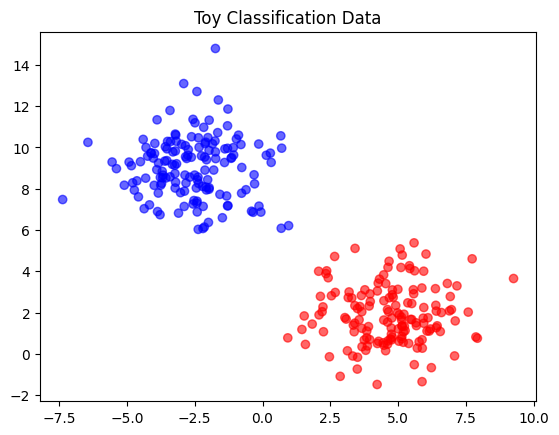

In [2]:
#generate data

# Create 2-class blob data
X, y = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.5)

# Visualize
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.6)
plt.title("Toy Classification Data")
plt.show()

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
#convert to tensors

x_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

x_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [4]:
#define MLP model
model = nn.Sequential(
    nn.Linear(2, 16),  # input layer → hidden layer (2 features → 16 neurons)
    nn.ReLU(),         # activation function (nonlinear!)
    nn.Linear(16, 2)   # hidden layer → output layer (16 → 2 classes)
)

In [5]:
#loss + optimizer

criterion = nn.CrossEntropyLoss() #takes confidence into account
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [9]:
#training

num_epochs = 100
losses = []

for epoch in range(num_epochs):
    # 1. Forward pass
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    losses.append(loss.item())

    # 2. Backward pass
    loss.backward()

    # 3. Optimizer step
    optimizer.step()

    # 4. Clear gradients
    optimizer.zero_grad()

    # 5. Print every 10 epochs
    if epoch % 10 == 0 or epoch == num_epochs - 1:
        print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f}")

Epoch   0 | Loss: 0.1190
Epoch  10 | Loss: 0.0200
Epoch  20 | Loss: 0.0074
Epoch  30 | Loss: 0.0043
Epoch  40 | Loss: 0.0030
Epoch  50 | Loss: 0.0023
Epoch  60 | Loss: 0.0018
Epoch  70 | Loss: 0.0013
Epoch  80 | Loss: 0.0008
Epoch  90 | Loss: 0.0005
Epoch  99 | Loss: 0.0003


In [11]:
#make predictions

# No gradients needed during evaluation
with torch.no_grad():
    outputs = model(x_train_tensor)
    predicted = torch.argmax(outputs, dim=1)


#check accuracy
correct = (predicted == y_train_tensor).sum().item()
total = y_train_tensor.size(0)
accuracy = correct / total * 100

print(f"Training Accuracy: {accuracy:.2f}%")

with torch.no_grad():
    test_outputs = model(x_test_tensor)
    test_predicted = torch.argmax(test_outputs, dim=1)
    test_accuracy = (test_predicted == y_test_tensor).float().mean().item()

print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 100.00%
Test Accuracy: 1.00


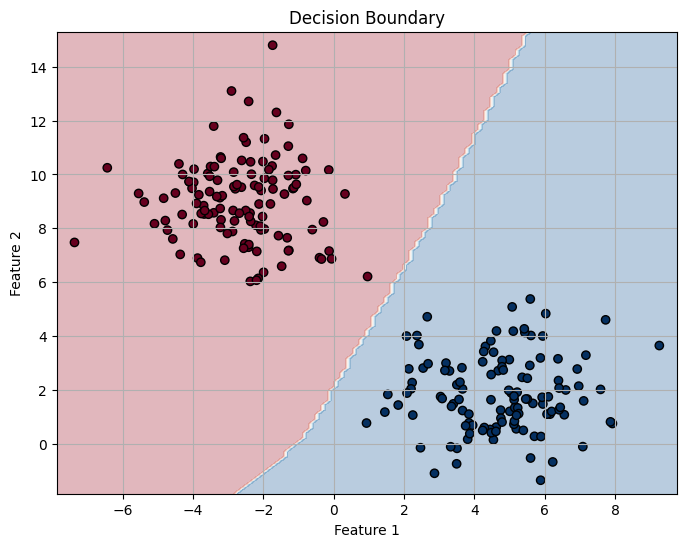

In [13]:
#visualize decision boundary

# Set range for the grid
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

# Flatten the grid and make it a tensor
grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32)

#make predictions on grid
with torch.no_grad():
    Z = model(grid_tensor)
    Z = torch.argmax(Z, dim=1).numpy()
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Background: model's predictions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)

# Data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k')

plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()